# https://www.kaggle.com/code/gabrielko/titanic-visualisation
https://happy-jihye.github.io/kaggle/kaggle-1/
을 참고해서 숙제함

## 1. Kaggle 사이트에서 Titaninc 문제 관련된 data download 및 파일 확인

In [1]:
# https://www.kaggle.com/code/gabrielko/titanic-visualisation
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Titanic/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Titanic/data\gender_submission.csv
../Titanic/data\test.csv
../Titanic/data\train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('../Titanic/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Titanic/data\gender_submission.csv
../Titanic/data\test.csv
../Titanic/data\train.csv


## 2. 문제 정의
  ###  Titanic Chellenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


## 3. Train / Test data 분석
  ### 읽기

In [3]:
train_df = pd.read_csv("../Titanic/data/train.csv")
test_df = pd.read_csv("../Titanic/data/test.csv")

In [4]:
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [5]:
test_df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
import pandas_profiling

In [9]:
train_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

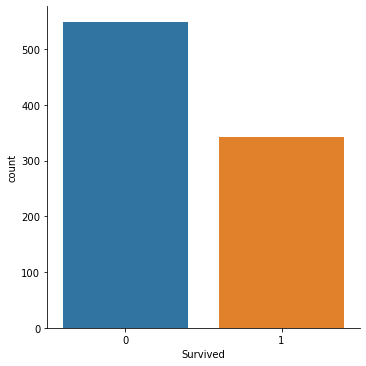

In [10]:
sns.catplot(x = "Survived", kind = "count", data = train_df)

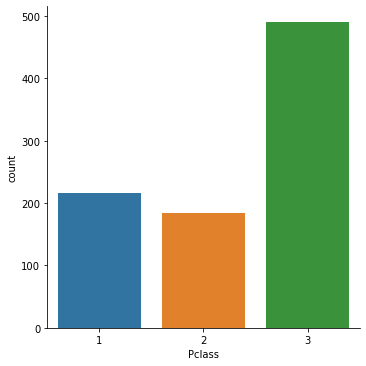

In [11]:
sns.catplot(x = "Pclass", kind = "count", data = train_df)

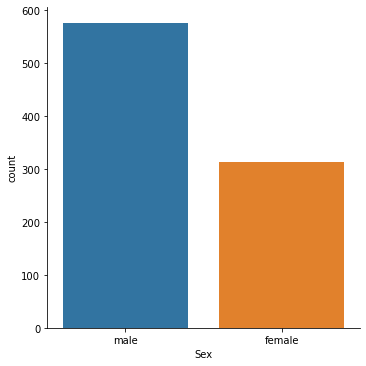

In [12]:
sns.catplot(x = "Sex", kind = "count", data = train_df)

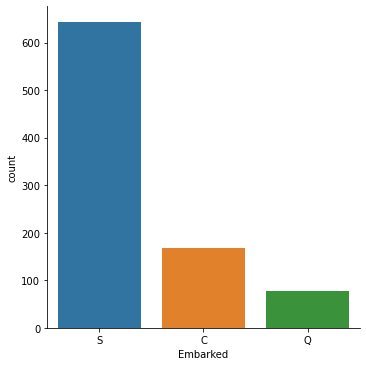

In [13]:
sns.catplot(x = "Embarked", kind = "count", data = train_df)

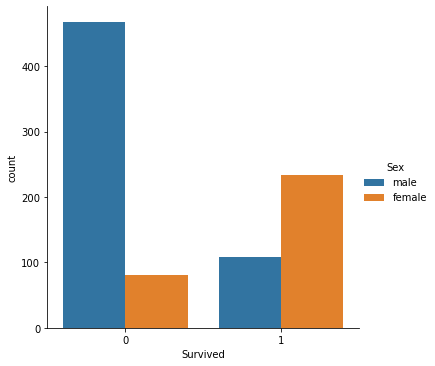

In [14]:
sns.catplot(x = "Survived", hue = "Sex", kind = "count", data = train_df)

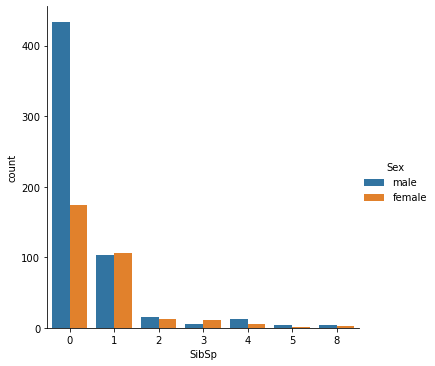

In [15]:
sns.catplot(x = "SibSp", hue = "Sex", kind = "count", data = train_df)

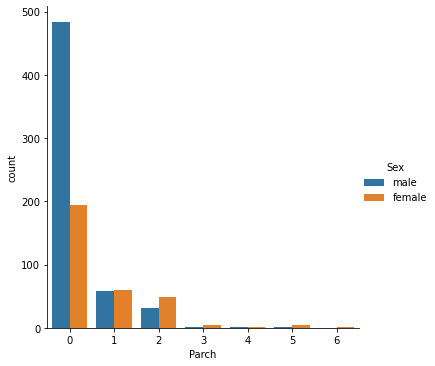

In [16]:
sns.catplot(x = "Parch", hue = "Sex", kind = "count", data = train_df)

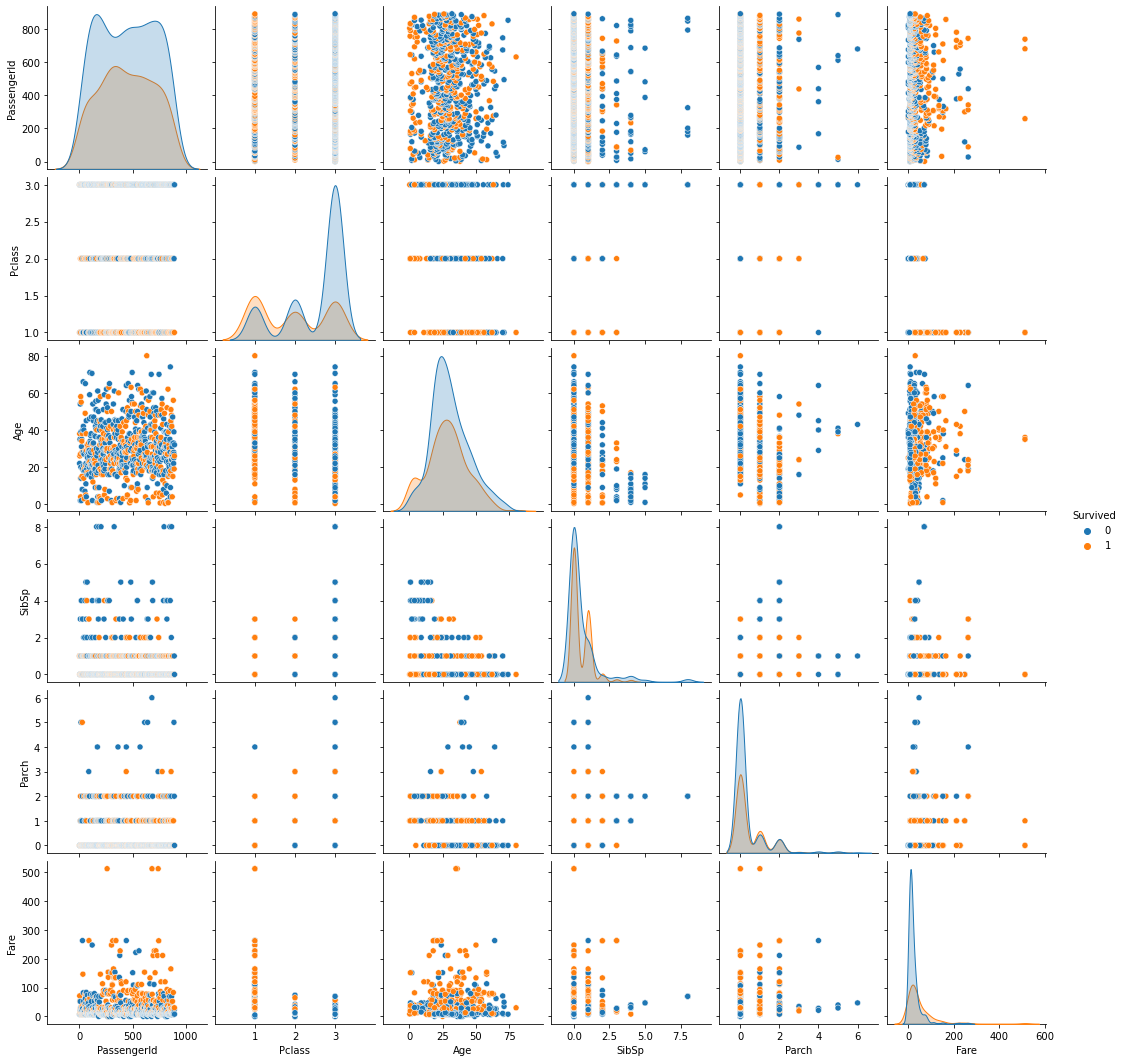

In [17]:
sns.pairplot(train_df, hue = "Survived")

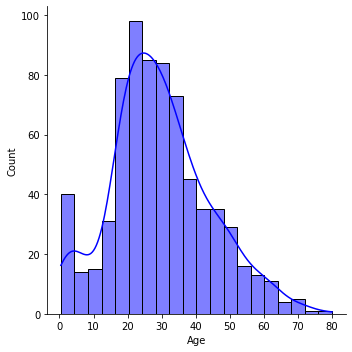

In [18]:
sns.displot(train_df["Age"], kde = "true", color = "blue")

In [19]:
train_df["Age"].mean()

29.69911764705882

In [20]:
train_df["Age"].median()

28.0

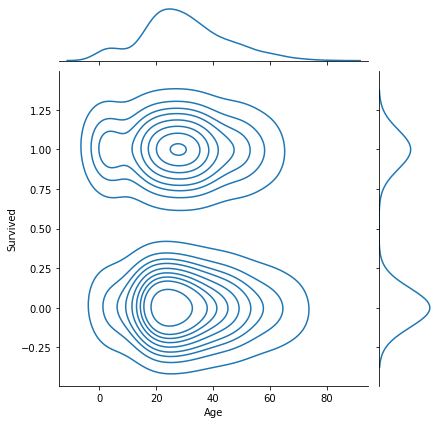

In [21]:
sns.jointplot(x='Age', y='Survived', data=train_df, kind='kde')

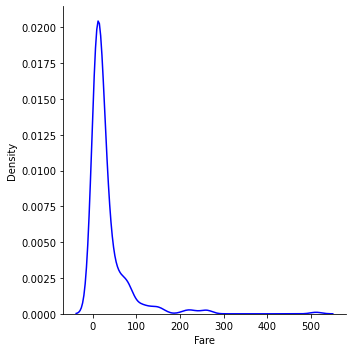

In [22]:
sns.displot(train_df["Fare"], kind = "kde", color = "blue")

In [23]:
fare_1= train_df.groupby("Pclass",as_index = False)["Fare"].sum()
fare_1

Pclass        Fare
0       1  18177.4125
1       2   3801.8417
2       3   6714.6951

In [24]:
fare_1.sort_values(by = "Fare",ascending = False, inplace = True)
fare_1

Pclass        Fare
0       1  18177.4125
2       3   6714.6951
1       2   3801.8417

Text(0.5, 0.98, 'Pclass vs Fare')

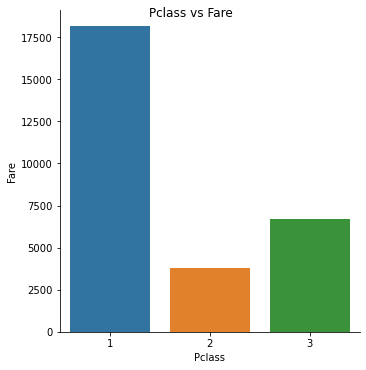

In [25]:
ax = sns.catplot(x = "Pclass", y = "Fare", kind = "bar", data = fare_1)
ax.fig.suptitle("Pclass vs Fare")

### Find MISSING VALUES
-First of all, the percentage of missing data on the basis of variables is checked.

-Ways to deal with missing data :

-It can be deleted (not recommended if there is no structural defect and the percentage of missing values is not too high).

-Can be filled with value :

-Can be filled with 0.

-If variable is categorical it can be filled with mod.

-If the variable is numeric and not normally distributed, it can be filled with the median, if it is close to the normal distribution, it can be filled with the mean.

-Can be filled with ML-based filling techniques.

In [26]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
import missingno as msno

<AxesSubplot:>

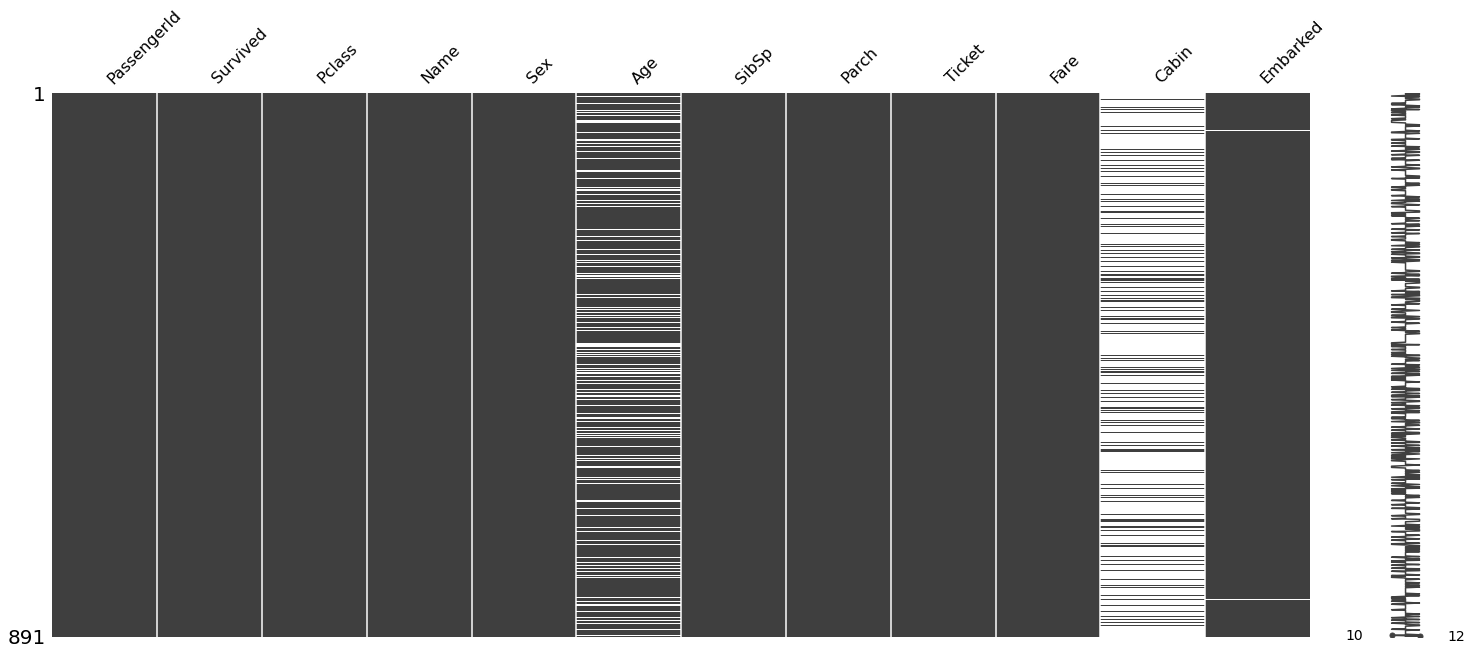

In [28]:
msno.matrix(train_df)

In [29]:
train_df.dropna()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [30]:
train_df.dropna(subset=["Age"])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
885      5            382652  29.1250   NaN        Q  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[714 rows x 12 columns]

# 4. Data Preprocessing
### Missing data 채우기

In [31]:
train_df["Age"].fillna(train_df["Age"].median(), inplace = True)
test_df["Age"].fillna(test_df["Age"].median(), inplace = True)
train_df["Embarked"].fillna('S', inplace = True)
train_df["Embarked"].fillna('S', inplace = True)
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace = True)

train_df.drop("Cabin", axis = 1, inplace = True)
test_df.drop("Cabin", axis = 1, inplace = True)

### 불필요 data 버리기

In [32]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### data 합치기

In [34]:
train_df["Family"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["Family"] = test_df["SibSp"] + test_df["Parch"] + 1

### Categorical 데이터를 Numerical 로 변환
Label Encoding

In [35]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Family  
0      0         A/5 21171   7.2500        S       2  
1      0          PC 17599  71.2833        C       2  
2      0  STON/O2. 3101282   7.9250        S       1  
3      0            113803  53.1000        S       2  
4      0            373450   8.0500        S       1

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])

### 불필요 data 버리기

In [38]:
train_df.drop(["PassengerId", "Name", "Ticket", "SibSp", "Parch", "Embarked"], axis = 1, inplace = True)
test_df.drop(["Name", "Ticket", "SibSp", "Parch", "Embarked"], axis = 1, inplace = True)

In [39]:
train_df.head()

Survived  Pclass  Sex   Age     Fare  Family
0         0       3    1  22.0   7.2500       2
1         1       1    0  38.0  71.2833       2
2         1       3    0  26.0   7.9250       1
3         1       1    0  35.0  53.1000       2
4         0       3    1  35.0   8.0500       1

### scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_df['Pclass'] = sc.fit_transform(train_df['Pclass'].values.reshape(-1,1))
train_df['Sex'] = sc.fit_transform(train_df['Sex'].values.reshape(-1,1))
train_df['Age'] = sc.fit_transform(train_df['Age'].values.reshape(-1,1))
train_df['Fare'] = sc.fit_transform(train_df['Fare'].values.reshape(-1,1))
train_df['Family'] = sc.fit_transform(train_df['Family'].values.reshape(-1,1))

test_df['Pclass'] = sc.fit_transform(test_df['Pclass'].values.reshape(-1,1))
test_df['Sex'] = sc.fit_transform(test_df['Sex'].values.reshape(-1,1))
test_df['Age'] = sc.fit_transform(test_df['Age'].values.reshape(-1,1))
test_df['Fare'] = sc.fit_transform(test_df['Fare'].values.reshape(-1,1))
test_df['Family'] = sc.fit_transform(test_df['Family'].values.reshape(-1,1))

In [41]:
train_df.head()

Survived    Pclass       Sex       Age      Fare    Family
0         0  0.827377  0.737695 -0.565736 -0.502445  0.059160
1         1 -1.566107 -1.355574  0.663861  0.786845  0.059160
2         1  0.827377 -1.355574 -0.258337 -0.488854 -0.560975
3         1 -1.566107 -1.355574  0.433312  0.420730  0.059160
4         0  0.827377  0.737695  0.433312 -0.486337 -0.560975

In [42]:
train_data = train_df.drop('Survived', axis=1)
target = train_df['Survived']

In [43]:
train_data.shape

(891, 5)

In [44]:
test_df.shape

(418, 6)

# 5. Modeling

In [45]:
# Importing Classifier Modules# Import 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
# clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test_df.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission_test1.csv', index=False)
submission = pd.read_csv('submission_test1.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1